# Basic Exercises on Data Importing - Understanding - Manipulating - Analysis - Visualization

## Section-1: The pupose of the below exercises (1-7) is to create dictionary and convert into dataframes, how to diplay etc...
## The below exercises required to create data 

### 1. Import the necessary libraries (pandas, numpy, datetime, re etc)

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### 2. Run the below line of code to create a dictionary and this will be used for below exercises

In [120]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 3. Assign it to a object called pokemon and it should be a pandas DataFrame

In [121]:
pokemon = pd.DataFrame(raw_data)
print(pokemon)

         name   evolution   type  hp pokedex
0   Bulbasaur     Ivysaur  grass  45     yes
1  Charmander  Charmeleon   fire  39      no
2    Squirtle   Wartortle  water  44     yes
3    Caterpie     Metapod    bug  45      no


### 4. If the DataFrame columns are in alphabetical order, change the order of the columns as name, type, hp, evolution, pokedex

In [122]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution', 'pokedex']]
print(pokemon)


         name   type  hp   evolution pokedex
0   Bulbasaur  grass  45     Ivysaur     yes
1  Charmander   fire  39  Charmeleon      no
2    Squirtle  water  44   Wartortle     yes
3    Caterpie    bug  45     Metapod      no


### 5. Add another column called place, and insert places (lakes, parks, hills, forest etc) of your choice.

In [123]:
pokemon['place'] = ['lakes', 'parks', 'hills', 'forest']
print(pokemon)

         name   type  hp   evolution pokedex   place
0   Bulbasaur  grass  45     Ivysaur     yes   lakes
1  Charmander   fire  39  Charmeleon      no   parks
2    Squirtle  water  44   Wartortle     yes   hills
3    Caterpie    bug  45     Metapod      no  forest


### 6. Display the data type of each column

In [124]:
print(pokemon.dtypes)

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object


### 7. Display the info of dataframe

In [125]:
print(pokemon.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       4 non-null      object
 1   type       4 non-null      object
 2   hp         4 non-null      int64 
 3   evolution  4 non-null      object
 4   pokedex    4 non-null      object
 5   place      4 non-null      object
dtypes: int64(1), object(5)
memory usage: 320.0+ bytes
None


## Section-2: The pupose of the below exercise (8-20) is to understand deleting data with pandas.
## The below exercises required to use wine.data

### 8. Import the dataset *wine.txt* from the folder and assign it to a object called wine

Please note that the original data text file doesn't contain any header. Please ensure that when you import the data, you should use a suitable argument so as to avoid data getting imported as header.

In [126]:
import pandas as pd

file_path = r'E:\Classes\Python\New folder\Basic Data Manipulation - Visualization Exercise\2. Basic Data Manipulation - Visualization Exercise\Exercise Data Files\wine.txt'
wine = pd.read_csv(file_path, header=None)
print(wine.head())

   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  


### 9. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [127]:
columns_to_delete = [0, 3, 6, 8, 10, 12, 13]
wine = wine.drop(columns=columns_to_delete)
print(wine.head())

      1     2     4    5     7     9     11
0  14.23  1.71  15.6  127  3.06  2.29  1.04
1  13.20  1.78  11.2  100  2.76  1.28  1.05
2  13.16  2.36  18.6  101  3.24  2.81  1.03
3  14.37  1.95  16.8  113  3.49  2.18  0.86
4  13.24  2.59  21.0  118  2.69  1.82  1.04


### 10. Assign the columns as below:

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [128]:
column_map = {
    1: 'alcohol',
    2: 'malic_acid',
    4: 'alcalinity_of_ash',
    5: 'magnesium',
    7: 'flavanoids',
    9: 'proanthocyanins',
    11: 'hue'
}
wine.rename(columns=column_map, inplace=True)
print(wine.head())

   alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
0    14.23        1.71               15.6        127        3.06   
1    13.20        1.78               11.2        100        2.76   
2    13.16        2.36               18.6        101        3.24   
3    14.37        1.95               16.8        113        3.49   
4    13.24        2.59               21.0        118        2.69   

   proanthocyanins   hue  
0             2.29  1.04  
1             1.28  1.05  
2             2.81  1.03  
3             2.18  0.86  
4             1.82  1.04  


### 11. Set the values of the first 3 values from alcohol column as NaN

In [129]:
wine.loc[:2, 'alcohol'] = pd.NA
print(wine.head())

   alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
0      NaN        1.71               15.6        127        3.06   
1      NaN        1.78               11.2        100        2.76   
2      NaN        2.36               18.6        101        3.24   
3    14.37        1.95               16.8        113        3.49   
4    13.24        2.59               21.0        118        2.69   

   proanthocyanins   hue  
0             2.29  1.04  
1             1.28  1.05  
2             2.81  1.03  
3             2.18  0.86  
4             1.82  1.04  


### 12. Now set the value of the rows 3 and 4 of magnesium as NaN

In [130]:
wine.loc[2:3, 'magnesium'] = pd.NA
print(wine.head())

   alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
0      NaN        1.71               15.6      127.0        3.06   
1      NaN        1.78               11.2      100.0        2.76   
2      NaN        2.36               18.6        NaN        3.24   
3    14.37        1.95               16.8        NaN        3.49   
4    13.24        2.59               21.0      118.0        2.69   

   proanthocyanins   hue  
0             2.29  1.04  
1             1.28  1.05  
2             2.81  1.03  
3             2.18  0.86  
4             1.82  1.04  


### 13. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [131]:
wine['alcohol'].fillna(10, inplace=True)
wine['magnesium'].fillna(100, inplace=True)
print(wine.head())

   alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
0    10.00        1.71               15.6      127.0        3.06   
1    10.00        1.78               11.2      100.0        2.76   
2    10.00        2.36               18.6      100.0        3.24   
3    14.37        1.95               16.8      100.0        3.49   
4    13.24        2.59               21.0      118.0        2.69   

   proanthocyanins   hue  
0             2.29  1.04  
1             1.28  1.05  
2             2.81  1.03  
3             2.18  0.86  
4             1.82  1.04  


### 14. Count the number of missing values in all columns.

In [132]:
missing_values_count = wine.isna().sum()
print(missing_values_count)

alcohol              0
malic_acid           0
alcalinity_of_ash    0
magnesium            0
flavanoids           0
proanthocyanins      0
hue                  0
dtype: int64


### 15.  Create an array of 10 random numbers up until 10 and save it.

In [133]:
import numpy as np
random_array = np.random.randint(10, size=10)
print(random_array)


[3 4 2 3 5 0 9 1 1 2]


### 16.  Set the rows corresponding to the random numbers to NaN in the column *alcohol*

In [134]:
random_array = np.random.randint(10, size=10)
wine.loc[random_array, 'alcohol'] = np.nan
print(wine.head())

   alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
0      NaN        1.71               15.6      127.0        3.06   
1      NaN        1.78               11.2      100.0        2.76   
2      NaN        2.36               18.6      100.0        3.24   
3      NaN        1.95               16.8      100.0        3.49   
4      NaN        2.59               21.0      118.0        2.69   

   proanthocyanins   hue  
0             2.29  1.04  
1             1.28  1.05  
2             2.81  1.03  
3             2.18  0.86  
4             1.82  1.04  


### 17.  How many missing values do we have now?

In [135]:
missing_values_count = wine['alcohol'].isna().sum()
print("Number of missing values in the 'alcohol' column:", missing_values_count)


Number of missing values in the 'alcohol' column: 7


### 18. Print only the non-null values in alcohol

In [136]:
non_null_alcohol = wine.dropna(subset=['alcohol'])['alcohol']
print(non_null_alcohol)


5      14.20
6      14.39
7      14.06
10     14.10
11     14.12
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 171, dtype: float64


### 19. Delete the rows that contain missing values

In [137]:
wine.dropna(how='any', inplace=True)
print(wine)


     alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
5      14.20        1.76               15.2      112.0        3.39   
6      14.39        1.87               14.6       96.0        2.52   
7      14.06        2.15               17.6      121.0        2.51   
10     14.10        2.16               18.0      105.0        3.32   
11     14.12        1.48               16.8       95.0        2.43   
..       ...         ...                ...        ...         ...   
173    13.71        5.65               20.5       95.0        0.61   
174    13.40        3.91               23.0      102.0        0.75   
175    13.27        4.28               20.0      120.0        0.69   
176    13.17        2.59               20.0      120.0        0.68   
177    14.13        4.10               24.5       96.0        0.76   

     proanthocyanins   hue  
5               1.97  1.05  
6               1.98  1.02  
7               1.25  1.06  
10              2.38  1.25  
11            

### 20.  Reset the index, so it starts with 0 again

In [138]:
wine.reset_index(drop=True, inplace=True)
print(wine)


     alcohol  malic_acid  alcalinity_of_ash  magnesium  flavanoids  \
0      14.20        1.76               15.2      112.0        3.39   
1      14.39        1.87               14.6       96.0        2.52   
2      14.06        2.15               17.6      121.0        2.51   
3      14.10        2.16               18.0      105.0        3.32   
4      14.12        1.48               16.8       95.0        2.43   
..       ...         ...                ...        ...         ...   
166    13.71        5.65               20.5       95.0        0.61   
167    13.40        3.91               23.0      102.0        0.75   
168    13.27        4.28               20.0      120.0        0.69   
169    13.17        2.59               20.0      120.0        0.68   
170    14.13        4.10               24.5       96.0        0.76   

     proanthocyanins   hue  
0               1.97  1.05  
1               1.98  1.02  
2               1.25  1.06  
3               2.38  1.25  
4             

## Section-3: The pupose of the below exercise (21-27) is to understand ***filtering & sorting*** data from dataframe.
## The below exercises required to use chipotle.tsv

This time we are going to pull data directly from the internet.  
Import the dataset directly from this link (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and create dataframe called chipo

In [139]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, delimiter='\t')
chipo.head()

    

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### 21. How many products cost more than $10.00? 

Use `str` attribute to remove the $ sign and convert the column to proper numeric type data before filtering.


In [140]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
products_above_10 = chipo[chipo['item_price'] > 10.00]
num_products_above_10 = len(products_above_10)
print("Number of products costing more than $10.00:", num_products_above_10)



Number of products costing more than $10.00: 1130


C:\Users\Daisy\AppData\Local\Temp\ipykernel_20520\4032414100.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)


### 22. Print the Chipo Dataframe & info about data frame

In [141]:
print("Chipo DataFrame:")
print(chipo)

print("\nInfo about the DataFrame:")
print(chipo.info())


Chipo DataFrame:
      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                   NaN        2.39  
1                                     

### 23. What is the price of each item? 
- Delete the duplicates in item_name and quantity
- Print a data frame with only two columns `item_name` and `item_price`
- Sort the values from the most to less expensive

In [142]:
chipo_unique = chipo.drop_duplicates(subset=['item_name', 'quantity'])
print(chipo_unique[['item_name', 'item_price']])
chipo_two_columns = chipo_unique[['item_name', 'item_price']]
print(chipo_two_columns)
chipo_sorted = chipo_two_columns.sort_values(by='item_price', ascending=False)
print(chipo_sorted)





                                  item_name  item_price
0              Chips and Fresh Tomato Salsa        2.39
1                                      Izze        3.39
2                          Nantucket Nectar        3.39
3     Chips and Tomatillo-Green Chili Salsa        2.39
4                              Chicken Bowl       16.98
...                                     ...         ...
3890                  Carnitas Crispy Tacos       17.98
3973                      Canned Soft Drink        5.00
4152                          Bottled Water       15.00
4354                       Steak Soft Tacos       18.50
4489                    Chips and Guacamole       17.80

[103 rows x 2 columns]
                                  item_name  item_price
0              Chips and Fresh Tomato Salsa        2.39
1                                      Izze        3.39
2                          Nantucket Nectar        3.39
3     Chips and Tomatillo-Green Chili Salsa        2.39
4                       

### 24. Sort by the name of the item

In [143]:
chipo_sorted_by_name = chipo.sort_values(by='item_name', ascending=True)
print(chipo_sorted_by_name[['item_name', 'item_price']])


              item_name  item_price
3389  6 Pack Soft Drink       12.98
341   6 Pack Soft Drink        6.49
1849  6 Pack Soft Drink        6.49
1860  6 Pack Soft Drink        6.49
2713  6 Pack Soft Drink        6.49
...                 ...         ...
2384  Veggie Soft Tacos        8.75
781   Veggie Soft Tacos        8.75
2851  Veggie Soft Tacos        8.49
1699  Veggie Soft Tacos       11.25
1395  Veggie Soft Tacos        8.49

[4622 rows x 2 columns]


### 25. What was the quantity of the most expensive item ordered?

In [144]:
chipo_sorted_by_price = chipo.sort_values(by='item_price', ascending=False)
most_expensive_item = chipo_sorted_by_price.iloc[0]
quantity_of_most_expensive_item = most_expensive_item['quantity']
print("Quantity of the most expensive item ordered:", quantity_of_most_expensive_item)


Quantity of the most expensive item ordered: 15


### 26. How many times were a Veggie Salad Bowl ordered?

In [145]:
item_quantities = chipo.groupby('item_name')['quantity'].sum()
veggie_salad_bowl_quantity = item_quantities.get('Veggie Salad Bowl', 0)
print("Quantity of Veggie Salad Bowl ordered:", veggie_salad_bowl_quantity)


Quantity of Veggie Salad Bowl ordered: 18


### 27. How many times people orderd more than one Canned Soda?

In [146]:
item_quantities = chipo.groupby('item_name')['quantity'].sum()
canned_soda_quantity_more_than_one = item_quantities.get('Canned Soda', 0)
print("Quantity of Canned Soda ordered more than once:", canned_soda_quantity_more_than_one)


Quantity of Canned Soda ordered more than once: 126


## Section-4: The purpose of the below exercises is to understand how to perform aggregations of data frame
## The below exercises (28-33) required to use occupation.csv

###  28. Import the dataset occupation.csv and assign object as users

In [147]:
file_path = r'E:\Classes\Python\New folder\Basic Data Manipulation - Visualization Exercise\2. Basic Data Manipulation - Visualization Exercise\Exercise Data Files\occupation.csv'
users = pd.read_csv(file_path,'|')
print(users)

     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


C:\Users\Daisy\AppData\Local\Temp\ipykernel_20520\2809626786.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  users = pd.read_csv(file_path,'|')


### 29. Discover what is the mean age per occupation

In [148]:
users.age.mean()

34.05196182396607

### 30. Discover the Male ratio per occupation and sort it from the most to the least.

Use numpy.where() to encode gender column.

In [149]:
users['male'] = np.where(users['gender'] == 'M', 1, 0)
male_ratio_per_occupation = users.groupby('occupation')['male'].mean().sort_values(ascending=False)
print(male_ratio_per_occupation)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: male, dtype: float64


### 31. For each occupation, calculate the minimum and maximum ages

In [150]:
age_stats_per_occupation = users.groupby('occupation')['age'].agg(min_age='min', max_age='max')
print(age_stats_per_occupation)

               min_age  max_age
occupation                     
administrator       21       70
artist              19       48
doctor              28       64
educator            23       63
engineer            22       70
entertainment       15       50
executive           22       69
healthcare          22       62
homemaker           20       50
lawyer              21       53
librarian           23       69
marketing           24       55
none                11       55
other               13       64
programmer          20       63
retired             51       73
salesman            18       66
scientist           23       55
student              7       42
technician          21       55
writer              18       60


### 32. For each combination of occupation and gender, calculate the mean age

In [151]:
mean_age_per_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_per_occupation_gender)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

### 33.  For each occupation present the percentage of women and men

In [152]:
gender_counts_per_occupation = users.groupby('occupation')['gender'].value_counts().unstack().fillna(0)
total_counts_per_occupation = gender_counts_per_occupation.sum(axis=1)
percentage_per_occupation = gender_counts_per_occupation.div(total_counts_per_occupation, axis=0) * 100
print(percentage_per_occupation)

gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor          0.000000  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


## Section-6: The purpose of the below exercises is to understand how to use lambda-apply-functions
## The below exercises (34-41) required to use student-mat.csv and student-por.csv files 

### 34. Import the datasets *student-mat* and *student-por* and append them and assigned object as df

In [153]:
file_path = r'E:\Classes\Python\New folder\Basic Data Manipulation - Visualization Exercise\2. Basic Data Manipulation - Visualization Exercise\Exercise Data Files\student-mat.csv'
student_mat = pd.read_csv(file_path)
print(student_mat)

file_path = r'E:\Classes\Python\New folder\Basic Data Manipulation - Visualization Exercise\2. Basic Data Manipulation - Visualization Exercise\Exercise Data Files\student-por.csv'
student_por = pd.read_csv(file_path)
print(student_por)


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health 

### 35. For the purpose of this exercise slice the dataframe from 'school' until the 'guardian' column

In [154]:
student_mat.loc[:, 'school':'guardian']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother
392,MS,M,21,R,GT3,T,1,1,other,other,course,other
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother


In [155]:
student_por.loc[:, 'school':'guardian']

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother


### 36. Create a lambda function that captalize strings (example: if we give at_home as input function and should give At_home as output.

In [156]:
capitalize_str = lambda x: x.capitalize()
input_str = "at_home"
output_str = capitalize_str(input_str)
print(output_str)  

At_home


### 37. Capitalize both Mjob and Fjob variables using above lamdba function

In [157]:
capitalize_str = lambda s: s.capitalize() if isinstance(s, str) else s
student_mat['Mjob'] = student_mat['Mjob'].apply(capitalize_str)
student_mat['Fjob'] = student_mat['Fjob'].apply(capitalize_str)
print(student_mat)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   At_home   Teacher   
1       GP   F   17       U     GT3       T     1     1   At_home     Other   
2       GP   F   15       U     LE3       T     1     1   At_home     Other   
3       GP   F   15       U     GT3       T     4     2    Health  Services   
4       GP   F   16       U     GT3       T     3     3     Other     Other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  Services  Services   
391     MS   M   17       U     LE3       T     3     1  Services  Services   
392     MS   M   21       R     GT3       T     1     1     Other     Other   
393     MS   M   18       R     LE3       T     3     2  Services     Other   
394     MS   M   19       U     LE3       T     1     1     Other   At_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [158]:
capitalize_str = lambda s: s.capitalize() if isinstance(s, str) else s
student_por['Mjob'] = student_mat['Mjob'].apply(capitalize_str)
student_por['Fjob'] = student_mat['Fjob'].apply(capitalize_str)
print(student_por)

    school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4  At_home   Teacher   
1       GP   F   17       U     GT3       T     1     1  At_home     Other   
2       GP   F   15       U     LE3       T     1     1  At_home     Other   
3       GP   F   15       U     GT3       T     4     2   Health  Services   
4       GP   F   16       U     GT3       T     3     3    Other     Other   
..     ...  ..  ...     ...     ...     ...   ...   ...      ...       ...   
644     MS   F   19       R     GT3       T     2     3      NaN       NaN   
645     MS   F   18       U     LE3       T     3     1      NaN       NaN   
646     MS   F   18       U     GT3       T     1     1      NaN       NaN   
647     MS   M   17       U     LE3       T     3     1      NaN       NaN   
648     MS   M   18       R     LE3       T     3     2      NaN       NaN   

     ... famrel freetime  goout  Dalc  Walc health absences  G1

### 38. Print the last elements of the data set. (Last few records)

In [159]:
print(student_mat.tail())

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     MS   M   20       U     LE3       A     2     2  Services  Services   
391     MS   M   17       U     LE3       T     3     1  Services  Services   
392     MS   M   21       R     GT3       T     1     1     Other     Other   
393     MS   M   18       R     LE3       T     3     2  Services     Other   
394     MS   M   19       U     LE3       T     1     1     Other   At_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[5 rows x 33 columns]


In [160]:
print(student_por.tail())

    school sex  age address famsize Pstatus  Medu  Fedu Mjob Fjob  ... famrel  \
644     MS   F   19       R     GT3       T     2     3  NaN  NaN  ...      5   
645     MS   F   18       U     LE3       T     3     1  NaN  NaN  ...      4   
646     MS   F   18       U     GT3       T     1     1  NaN  NaN  ...      1   
647     MS   M   17       U     LE3       T     3     1  NaN  NaN  ...      2   
648     MS   M   18       R     LE3       T     3     2  NaN  NaN  ...      4   

    freetime  goout  Dalc  Walc health absences  G1  G2  G3  
644        4      2     1     2      5        4  10  11  10  
645        3      4     1     1      1        4  15  15  16  
646        1      1     1     1      5        6  11  12   9  
647        4      5     3     4      2        6  10  10  10  
648        4      1     3     4      5        4  10  11  11  

[5 rows x 33 columns]


### 39. Did you notice the original dataframe is still lowercase? Why is that? Fix it and captalize Mjob and Fjob.

In [161]:
student_mat['Mjob'] = student_mat['Mjob'].str.capitalize() 
student_mat['Fjob'] = student_mat['Fjob'].str.capitalize()
print(student_mat)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   At_home   Teacher   
1       GP   F   17       U     GT3       T     1     1   At_home     Other   
2       GP   F   15       U     LE3       T     1     1   At_home     Other   
3       GP   F   15       U     GT3       T     4     2    Health  Services   
4       GP   F   16       U     GT3       T     3     3     Other     Other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  Services  Services   
391     MS   M   17       U     LE3       T     3     1  Services  Services   
392     MS   M   21       R     GT3       T     1     1     Other     Other   
393     MS   M   18       R     LE3       T     3     2  Services     Other   
394     MS   M   19       U     LE3       T     1     1     Other   At_home   

     ... famrel freetime  goout  Dalc  Walc health 

In [162]:
student_por['Mjob'] = student_por['Mjob'].str.capitalize() 
student_por['Fjob'] = student_por['Fjob'].str.capitalize()
print(student_por)

    school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4  At_home   Teacher   
1       GP   F   17       U     GT3       T     1     1  At_home     Other   
2       GP   F   15       U     LE3       T     1     1  At_home     Other   
3       GP   F   15       U     GT3       T     4     2   Health  Services   
4       GP   F   16       U     GT3       T     3     3    Other     Other   
..     ...  ..  ...     ...     ...     ...   ...   ...      ...       ...   
644     MS   F   19       R     GT3       T     2     3      NaN       NaN   
645     MS   F   18       U     LE3       T     3     1      NaN       NaN   
646     MS   F   18       U     GT3       T     1     1      NaN       NaN   
647     MS   M   17       U     LE3       T     3     1      NaN       NaN   
648     MS   M   18       R     LE3       T     3     2      NaN       NaN   

     ... famrel freetime  goout  Dalc  Walc health absences  G1

### 40. Create a function called majority that return a boolean value to a new column called legal_drinker

In [163]:
def majority(age):
    return age >= 18
student_mat['legal_drinker'] = student_mat['age'].apply(majority)
print(student_mat)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   At_home   Teacher   
1       GP   F   17       U     GT3       T     1     1   At_home     Other   
2       GP   F   15       U     LE3       T     1     1   At_home     Other   
3       GP   F   15       U     GT3       T     4     2    Health  Services   
4       GP   F   16       U     GT3       T     3     3     Other     Other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  Services  Services   
391     MS   M   17       U     LE3       T     3     1  Services  Services   
392     MS   M   21       R     GT3       T     1     1     Other     Other   
393     MS   M   18       R     LE3       T     3     2  Services     Other   
394     MS   M   19       U     LE3       T     1     1     Other   At_home   

     ... freetime goout  Dalc  Walc  health absence

In [164]:
def majority(age):
    return age >= 18
student_por['legal_drinker'] = student_por['age'].apply(majority)
print(student_por)

    school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4  At_home   Teacher   
1       GP   F   17       U     GT3       T     1     1  At_home     Other   
2       GP   F   15       U     LE3       T     1     1  At_home     Other   
3       GP   F   15       U     GT3       T     4     2   Health  Services   
4       GP   F   16       U     GT3       T     3     3    Other     Other   
..     ...  ..  ...     ...     ...     ...   ...   ...      ...       ...   
644     MS   F   19       R     GT3       T     2     3      NaN       NaN   
645     MS   F   18       U     LE3       T     3     1      NaN       NaN   
646     MS   F   18       U     GT3       T     1     1      NaN       NaN   
647     MS   M   17       U     LE3       T     3     1      NaN       NaN   
648     MS   M   18       R     LE3       T     3     2      NaN       NaN   

     ... freetime goout  Dalc  Walc  health absences  G1  G2  G

### 41. Multiply every number of the dataset by 10. 

In [165]:
multiply_by_10 = lambda x: x * 10 if isinstance(x, (int, float)) else x
student_mat = student_mat.applymap(multiply_by_10)
print(student_mat)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F  180       U     GT3       A    40    40   At_home   Teacher   
1       GP   F  170       U     GT3       T    10    10   At_home     Other   
2       GP   F  150       U     LE3       T    10    10   At_home     Other   
3       GP   F  150       U     GT3       T    40    20    Health  Services   
4       GP   F  160       U     GT3       T    30    30     Other     Other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M  200       U     LE3       A    20    20  Services  Services   
391     MS   M  170       U     LE3       T    30    10  Services  Services   
392     MS   M  210       R     GT3       T    10    10     Other     Other   
393     MS   M  180       R     LE3       T    30    20  Services     Other   
394     MS   M  190       U     LE3       T    10    10     Other   At_home   

     ... freetime goout  Dalc  Walc  health absence

In [166]:
multiply_by_10 = lambda x: x * 10 if isinstance(x, (int, float)) else x
student_por = student_por.applymap(multiply_by_10)
print(student_por)

    school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0       GP   F  180       U     GT3       A    40    40  At_home   Teacher   
1       GP   F  170       U     GT3       T    10    10  At_home     Other   
2       GP   F  150       U     LE3       T    10    10  At_home     Other   
3       GP   F  150       U     GT3       T    40    20   Health  Services   
4       GP   F  160       U     GT3       T    30    30    Other     Other   
..     ...  ..  ...     ...     ...     ...   ...   ...      ...       ...   
644     MS   F  190       R     GT3       T    20    30      NaN       NaN   
645     MS   F  180       U     LE3       T    30    10      NaN       NaN   
646     MS   F  180       U     GT3       T    10    10      NaN       NaN   
647     MS   M  170       U     LE3       T    30    10      NaN       NaN   
648     MS   M  180       R     LE3       T    30    20      NaN       NaN   

     ... freetime goout  Dalc  Walc  health absences   G1   G2 

## Section-6: The purpose of the below exercises is to understand how to perform simple joins
## The below exercises (42-48) required to use cars1.csv and cars2.csv files 

### 42. Import the datasets cars1.csv and cars2.csv and assign names as cars1 and cars2

In [167]:
cars1 = pd.read_csv(r'E:\Classes\Python\New folder\Basic Data Manipulation - Visualization Exercise\2. Basic Data Manipulation - Visualization Exercise\Exercise Data Files\cars1.csv')
cars2 = pd.read_csv(r'E:\Classes\Python\New folder\Basic Data Manipulation - Visualization Exercise\2. Basic Data Manipulation - Visualization Exercise\Exercise Data Files\cars2.csv')

In [168]:
print(cars1)
print(cars2)

      mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0    18.0          8           307        130    3504          12.0     70   
1    15.0          8           350        165    3693          11.5     70   
2    18.0          8           318        150    3436          11.0     70   
3    16.0          8           304        150    3433          12.0     70   
4    17.0          8           302        140    3449          10.5     70   
..    ...        ...           ...        ...     ...           ...    ...   
193  24.0          6           200         81    3012          17.6     76   
194  22.5          6           232         90    3085          17.6     76   
195  29.0          4            85         52    2035          22.2     76   
196  24.5          4            98         60    2164          22.1     76   
197  29.0          4            90         70    1937          14.2     76   

     origin                        car  Unnamed: 9  Unnamed: 10

   ### 43. Print the information to cars1 by applying below functions 
   hint: Use different functions/methods like type(), head(), tail(), columns(), info(), dtypes(), index(), shape(), count(), size(), ndim(), axes(), describe(), memory_usage(), sort_values(), value_counts()
   Also create profile report using pandas_profiling.Profile_Report

In [169]:
# Print the data type of each column
print("Data Types of Columns:")
print(cars1.dtypes)

# Display the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(cars1.head())

# Display the last few rows of the DataFrame
print("\nLast Few Rows:")
print(cars1.tail())

# Display the column names of the DataFrame
print("\nColumn Names:")
print(cars1.columns)

# Display general information about the DataFrame (e.g., non-null counts, data types)
print("\nDataFrame Info:")
print(cars1.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(cars1.describe())

# Get the number of rows and columns in the DataFrame
print("\nNumber of Rows and Columns:")
print(cars1.shape)

# Get the number of non-null values in each column
print("\nNumber of Non-Null Values in Each Column:")
print(cars1.count())

# Get the total number of elements in the DataFrame
print("\nTotal Number of Elements:")
print(cars1.size)

# Get the number of dimensions of the DataFrame
print("\nNumber of Dimensions:")
print(cars1.ndim)

# Get the row and column axes labels of the DataFrame
print("\nRow and Column Axes Labels:")
print(cars1.axes)

# Sort the DataFrame by a specific column (e.g., 'mpg') in ascending order
sorted_cars1 = cars1.sort_values(by='mpg', ascending=True)
print("\nDataFrame Sorted by 'mpg' in Ascending Order:")
print(sorted_cars1.head())

# Get the count of unique values in the 'origin' column
print("\nCount of Unique Values in 'origin' Column:")
print(cars1['origin'].value_counts())

# Create a profile report using pandas_profiling
import pandas as pd
from pandas_profiling import ProfileReport
profile = ProfileReport(cars1, title='Cars Dataset Profile Report', explorative=True)
profile.to_file('cars1_profile_report.html')


Data Types of Columns:
mpg             float64
cylinders         int64
displacement      int64
horsepower       object
weight            int64
acceleration    float64
model             int64
origin            int64
car              object
Unnamed: 9      float64
Unnamed: 10     float64
Unnamed: 11     float64
Unnamed: 12     float64
Unnamed: 13     float64
dtype: object

First Few Rows:
    mpg  cylinders  displacement horsepower  weight  acceleration  model  \
0  18.0          8           307        130    3504          12.0     70   
1  15.0          8           350        165    3693          11.5     70   
2  18.0          8           318        150    3436          11.0     70   
3  16.0          8           304        150    3433          12.0     70   
4  17.0          8           302        140    3449          10.5     70   

   origin                        car  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0       1  chevrolet chevelle malibu         NaN          NaN          NaN 

C:\Users\Daisy\AppData\Local\Temp\ipykernel_20520\1534144876.py:56: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 44. It seems our first dataset has some unnamed blank columns, fix cars1

In [170]:
cars1 = cars1.dropna(axis=1, how='all')
print(cars1_cleaned)


NameError: name 'cars1_cleaned' is not defined

### 45. What is the number of observations in each dataset?

In [ ]:
num_observations_cars1 = cars1.shape[0]
num_observations_cars2 = cars2.shape[0]

print("Number of Observations in cars1:", num_observations_cars1)
print("Number of Observations in cars2:", num_observations_cars2)


### 46. Join cars1 and cars2 into a single DataFrame called cars

In [ ]:
cars = pd.concat([cars1, cars2], ignore_index=True)
print(cars)


### 47. There is a column missing, called owners. Create a random number Series from 15,000 to 73,000.

In [ ]:
num_owners = np.random.randint(15000, 73001, size=cars.shape[0])


### 48. Add the column owners to cars

In [ ]:
cars['owners'] = num_owners
print(cars)

## Section-7: The purpose of the below exercises is to understand how to perform date time operations

### 49. Write a Python script to display the
- a. Current date and time
- b. Current year
- c. Month of year
- d. Week number of the year
- e. Weekday of the week
- f. Day of year
- g. Day of the month
- h. Day of week

In [ ]:
import datetime
current_datetime = datetime.datetime.now()
current_year = current_datetime.year
month_of_year = current_datetime.month
week_number_of_year = current_datetime.isocalendar()[1]
weekday_of_week = current_datetime.weekday()
day_of_year = current_datetime.timetuple().tm_yday
day_of_month = current_datetime.day
day_of_week = current_datetime.strftime("%A")
print("Current Date and Time:", current_datetime)
print("Current Year:", current_year)
print("Month of Year:", month_of_year)
print("Week Number of the Year:", week_number_of_year)
print("Weekday of the Week:", weekday_of_week)
print("Day of the Year:", day_of_year)
print("Day of the Month:", day_of_month)
print("Day of the Week:", day_of_week)


### 50. Write a Python program to convert a string to datetime.
Sample String : Jul 1 2014 2:43PM 

Expected Output : 2014-07-01 14:43:00

In [ ]:
from datetime import datetime

def convert_to_datetime(input_string):
    # Define the format of the input string
    input_format = '%b %d %Y %I:%M%p'
    
    # Parse the input string into a datetime object
    datetime_obj = datetime.strptime(input_string, input_format)
    
    # Convert the datetime object to the desired output format
    output_format = '%Y-%m-%d %H:%M:%S'
    formatted_datetime = datetime_obj.strftime(output_format)
    
    return formatted_datetime

# Sample String
sample_string = "Jul 1 2014 2:43PM"

# Convert the sample string to datetime
result = convert_to_datetime(sample_string)

# Display the expected output
print("Expected Output:", result)


### 51. Write a Python program to subtract five days from current date.

Current Date : 2015-06-22

5 days before Current Date : 2015-06-17

In [ ]:
from datetime import datetime, timedelta

def subtract_days_from_date(current_date_str, days_to_subtract):
    
    current_date = datetime.strptime(current_date_str, "%Y-%m-%d")
    
    
    new_date = current_date - timedelta(days=days_to_subtract)
    
    
    new_date_str = new_date.strftime("%Y-%m-%d")
    
    return new_date_str


current_date_str = "2015-06-22"


days_to_subtract = 5


result = subtract_days_from_date(current_date_str, days_to_subtract)


print("Current Date:", current_date_str)
print(f"{days_to_subtract} days before Current Date:", result)


### 52. Write a Python program to convert unix timestamp string to readable date.

Sample Unix timestamp string : 1284105682
    
Expected Output : 2010-09-10 13:31:22

In [ ]:
def convert_unix_timestamp(unix_timestamp_str):
    
    unix_timestamp = int(unix_timestamp_str)
    
    
    datetime_obj = datetime.datetime.fromtimestamp(unix_timestamp)
    
    
    formatted_date = datetime_obj.strftime('%Y-%m-%d %H:%M:%S')
    
    return formatted_date


unix_timestamp_str = '1284105682'


result = convert_unix_timestamp(unix_timestamp_str)


print("Unix Timestamp:", unix_timestamp_str)
print("Readable Date:", result)


### 53. Convert the below Series to pandas datetime : 

DoB = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42"])

Make sure that the year is 19XX not 20XX

In [ ]:
DoB = pd.Series(["07Sep59", "01Jan55", "15Dec47", "11Jul42"])


parsed_dates = pd.to_datetime(DoB, format='%d%b%y')


parsed_dates = parsed_dates.apply(lambda x: x.replace(year=x.year - 100) if x.year >= 2000 else x)


print(parsed_dates)


### 54. Write a Python program to get days between two dates. 

In [ ]:
from datetime import datetime

def days_between_dates(date_str1, date_str2):
    
    date1 = datetime.strptime(date_str1, "%Y-%m-%d")
    date2 = datetime.strptime(date_str2, "%Y-%m-%d")

    delta = date2 - date1

    num_days = delta.days

    return num_days


date_str1 = "2023-07-20"
date_str2 = "2023-07-26"


result = days_between_dates(date_str1, date_str2)


print("Number of days between", date_str1, "and", date_str2, "is:", result)


### 55. Convert the below date to datetime and then change its display format using the .dt module

Date = "15Dec1989"

Result : "Friday, 15 Dec 98"

In [ ]:
from datetime import datetime

def format_date(date_str):
    
    date_obj = datetime.strptime(date_str, "%d%b%Y")

    
    formatted_date = date_obj.strftime("%A, %d %b %y")

    return formatted_date


date_str = "15Dec1989"


result = format_date(date_str)


print("Result:", result)


## The below exercises (56-66) required to use wind.data file 

### About wind.data:

The data have been modified to contain some missing values, identified by NaN.  

1. The data in 'wind.data' has the following format:

### 56. Import the dataset wind.data and assign it to a variable called data and replace the first 3 columns by a proper date time index

In [194]:
import pandas as pd


column_names = ["Yr", "Mo", "Dy", "RPT", "VAL", "ROS", "KIL", "SHA", "BIR", "DUB", "CLA", "MUL", "CLO", "BEL", "MAL"]
data = pd.read_csv(r'E:\Classes\Python\New folder\Basic Data Manipulation - Visualization Exercise\2. Basic Data Manipulation - Visualization Exercise\Exercise Data Files\wind.data')
data.loc[data["Yr"] < 70, "Yr"] += 1900
data["Date"] = pd.to_datetime(data[["Yr", "Mo", "Dy"]].astype(str).agg('-'.join, axis=1))
print(data.head())

     Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  1961   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  1961   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  1961   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  1961   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  1961   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL       Date  
0  12.58  18.50  15.04 1961-01-01  
1   9.67  17.54  13.83 1961-01-02  
2   7.67  12.75  12.71 1961-01-03  
3   5.88   5.46  10.88 1961-01-04  
4  10.34  12.92  11.83 1961-01-05  


### 57. Year 2061 is seemingly imporoper. Convert every year which are < 70 to 19XX instead of 20XX.

In [191]:
data.drop(columns=["Yr","Mo", "Dy"], inplace=True)
print(data.head())

     RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL    CLO    BEL  \
0  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83  12.58  18.50   
1  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   9.67  17.54   
2  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   7.67  12.75   
3  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   5.88   5.46   
4  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92  10.34  12.92   

     MAL       Date  
0  15.04 1961-01-01  
1  13.83 1961-01-02  
2  12.71 1961-01-03  
3  10.88 1961-01-04  
4  11.83 1961-01-05  


### 58. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [192]:
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index('Date')
data.head()                              

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 59. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [183]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


### 60. Compute how many non-missing values there are in total.

In [184]:
data.shape[0]- data.isnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

### 61. Calculate the mean windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [185]:
data.sum().sum()/data.notna().sum().sum()

10.227883764282181

### 62. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [186]:
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


### 63. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [187]:
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis = 1)
day_stats['max'] = data.max(axis = 1)
day_stats['mean'] = data.mean(axis = 1)
day_stats['std'] = data.std(axis = 1)
day_stats.head()

,min,max,mean,std
Date,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


### 64. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

In [188]:
data.index = pd.to_datetime(data.index)
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### 65. Calculate the mean windspeed for each month in the dataset.  
#### Treat January 1961 and January 1962 as *different* months.
#### (hint: first find a  way to create an identifier unique for each month.)

In [193]:
data['Year_Month'] = pd.to_datetime(data.index).to_period('M')
mean_windspeed_per_month = data.groupby('Year_Month').mean()
print(mean_windspeed_per_month['VAL'])

Year_Month
1961-01    11.988333
1961-02    14.975357
1961-03    11.296452
1961-04     9.427667
1961-05     8.850000
             ...    
2072-08     6.824194
2072-09     7.534000
2072-10     9.816774
2072-11    12.351667
2072-12    15.786774
Freq: M, Name: VAL, Length: 216, dtype: float64


### 66. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [174]:
data['Week'] = pd.to_datetime(data.index).strftime('%U').astype(int)
data_first_52_weeks = data[data['Week'] <= 52]
weekly_statistics = data_first_52_weeks.groupby('Week').agg(
    min_windspeed=pd.NamedAgg(column='VAL', aggfunc='min'),
    max_windspeed=pd.NamedAgg(column='VAL', aggfunc='max'),
    mean_windspeed=pd.NamedAgg(column='VAL', aggfunc='mean'),
    std_windspeed=pd.NamedAgg(column='VAL', aggfunc='std')
)

print(weekly_statistics)


      min_windspeed  max_windspeed  mean_windspeed  std_windspeed
Week                                                             
0              0.21          33.37       10.644314       5.267356


## The below exercises (67-70) required to use appl_1980_2014.csv  file

In [209]:
appl_1980_2014 = pd.read_csv(r'E:\Classes\Python\New folder\Basic Data Manipulation - Visualization Exercise\2. Basic Data Manipulation - Visualization Exercise\Exercise Data Files\appl_1980_2014.csv')
appl_1980_2014

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 67. Import the file appl_1980_2014.csv and assign it to a variable called 'apple'

In [210]:
apple=appl_1980_2014
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 68.  Check out the type of the columns

In [211]:
apple.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### 69. Transform the Date column as a datetime type

In [212]:
apple['Date'] = pd.to_datetime(apple['Date'])

apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 70.  Set the date as the index

In [213]:
apple.set_index('Date', inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### 71.  Is there any duplicate dates?

In [214]:
duplicates = apple.index.duplicated()
duplicate_rows = apple[duplicates]

if not duplicate_rows.empty:
    print("Rows with duplicate dates:")
    print(duplicate_rows)
else:
    print("No duplicate dates found.")


No duplicate dates found.


### 72.  The index is from the most recent date. Sort the data so that the first entry is the oldest date.

In [217]:
apple.sort_index(ascending=True, inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### 73. Get the last business day of each month

In [218]:
last_business_days = apple.resample('BM').last()
print(last_business_days)

              Open    High     Low   Close     Volume  Adj Close
Date                                                            
1980-12-31   34.25   34.25   34.13   34.13    8937600       0.53
1981-01-30   28.50   28.50   28.25   28.25   11547200       0.44
1981-02-27   26.50   26.75   26.50   26.50    3690400       0.41
1981-03-31   24.75   24.75   24.50   24.50    3998400       0.38
1981-04-30   28.38   28.62   28.38   28.38    3152800       0.44
...            ...     ...     ...     ...        ...        ...
2014-03-31  539.23  540.81  535.93  536.74   42167300      76.25
2014-04-30  592.64  599.43  589.80  590.09  114160200      83.83
2014-05-30  637.98  644.17  628.90  633.00  141005200      90.43
2014-06-30   92.10   93.73   92.09   92.93   49482300      92.93
2014-07-31   96.27   96.80   93.92   95.35   65130000      95.35

[404 rows x 6 columns]


### 74.  What is the difference in days between the first day and the oldest

In [219]:
oldest_date = apple.index[0]
first_date = apple.index[-1]
difference_in_days = (first_date - oldest_date).days
print("Difference in days between the first day and the oldest day:", difference_in_days)

Difference in days between the first day and the oldest day: 12261


### 75.  How many months in the data we have?

In [220]:
num_months = len(apple.resample('M'))
print("Number of months in the data:", num_months)

Number of months in the data: 404


## Section-8: The purpose of the below exercises is to understand how to create basic graphs

### 76. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

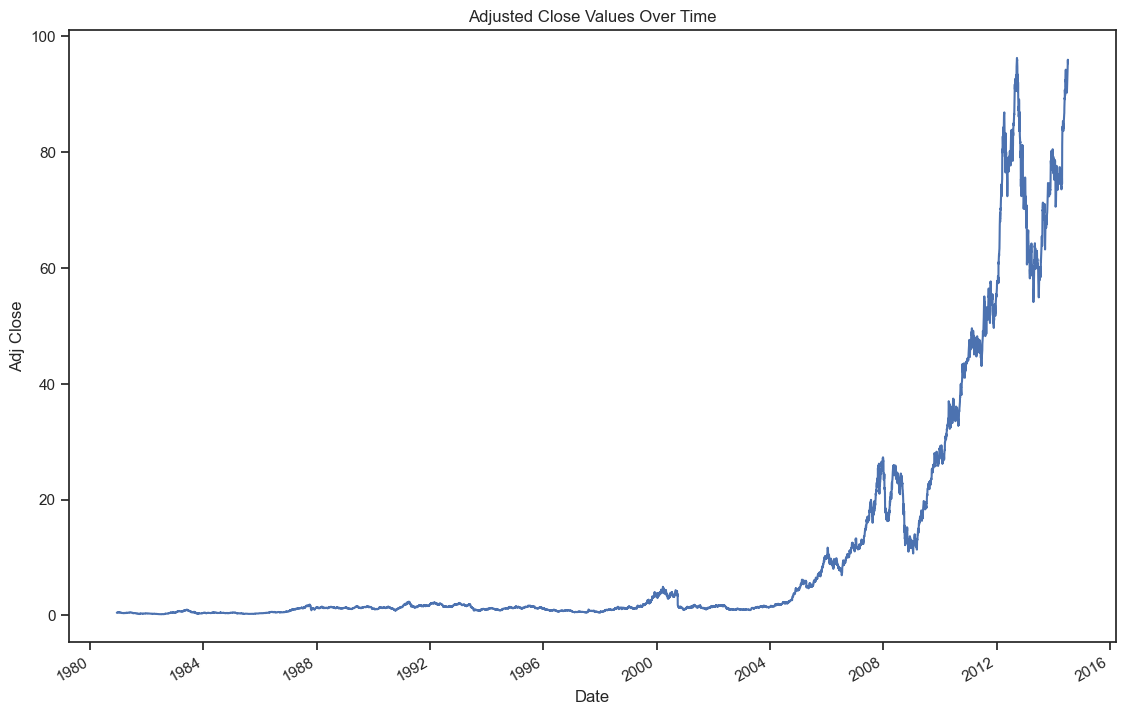

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(13.5, 9))
apple['Adj Close'].plot()
plt.title('Adjusted Close Values Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()


## The below exercises (77-80) required to use Online_Retail.csv file

### 77. Import the dataset from this Online_Retail.csv and assign it to a variable called online_rt

In [236]:
file_path = r'E:\Classes\Python\New folder\Basic Data Manipulation - Visualization Exercise\2. Basic Data Manipulation - Visualization Exercise\Exercise Data Files\Online_Retail.csv'
online_rt = pd.read_csv(file_path, encoding='ISO-8859-1')
online_rt.head()                        

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### 78. Create a barchart with the 10 countries that have the most 'Quantity' ordered except UK

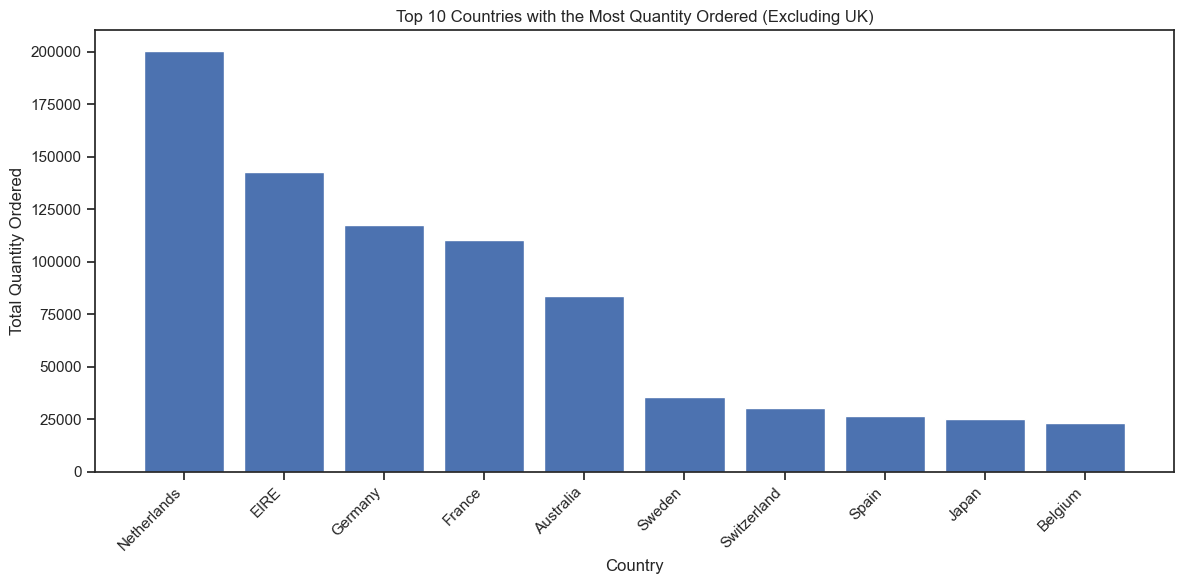

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
filtered_data = online_rt[online_rt['Country'] != 'United Kingdom']
country_quantity = filtered_data.groupby('Country')['Quantity'].sum()
sorted_country_quantity = country_quantity.sort_values(ascending=False)
top_10_countries = sorted_country_quantity.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Total Quantity Ordered')
plt.title('Top 10 Countries with the Most Quantity Ordered (Excluding UK)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 79.  Exclude negative Quatity entries

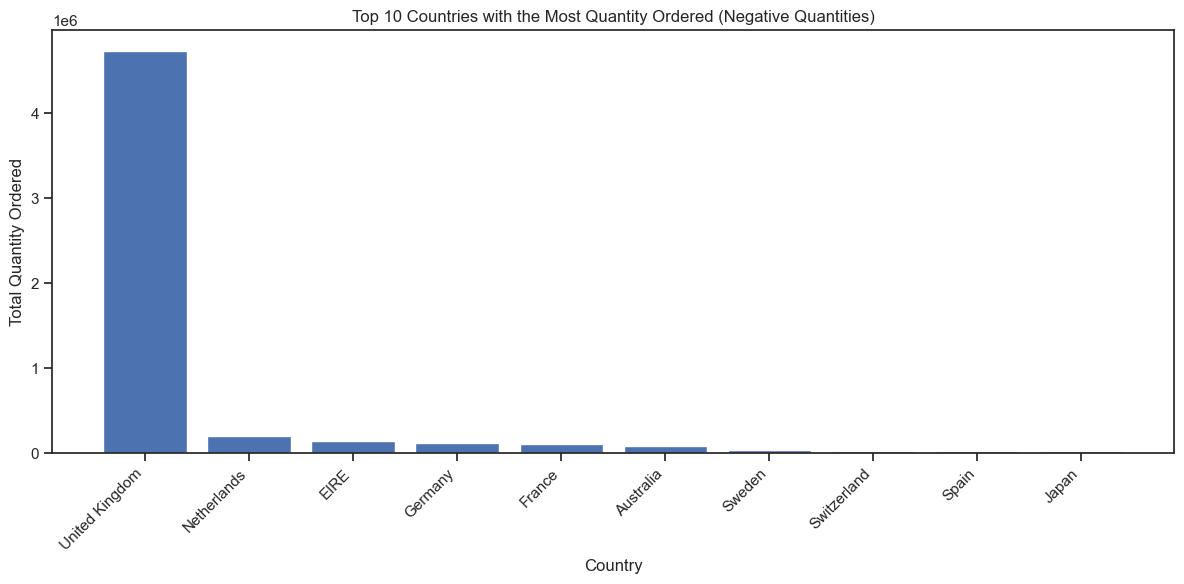

In [239]:
filtered_data = online_rt[(online_rt['Quantity'] >= 0)]
country_quantity = filtered_data.groupby('Country')['Quantity'].sum()
sorted_country_quantity = country_quantity.sort_values(ascending=False)
top_10_countries = sorted_country_quantity.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Total Quantity Ordered')
plt.title('Top 10 Countries with the Most Quantity Ordered (Negative Quantities)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 80. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries
Hint: First we need to find top-3 countries based on revenue, then create scater plot between Quantity and Unitprice for each country separately


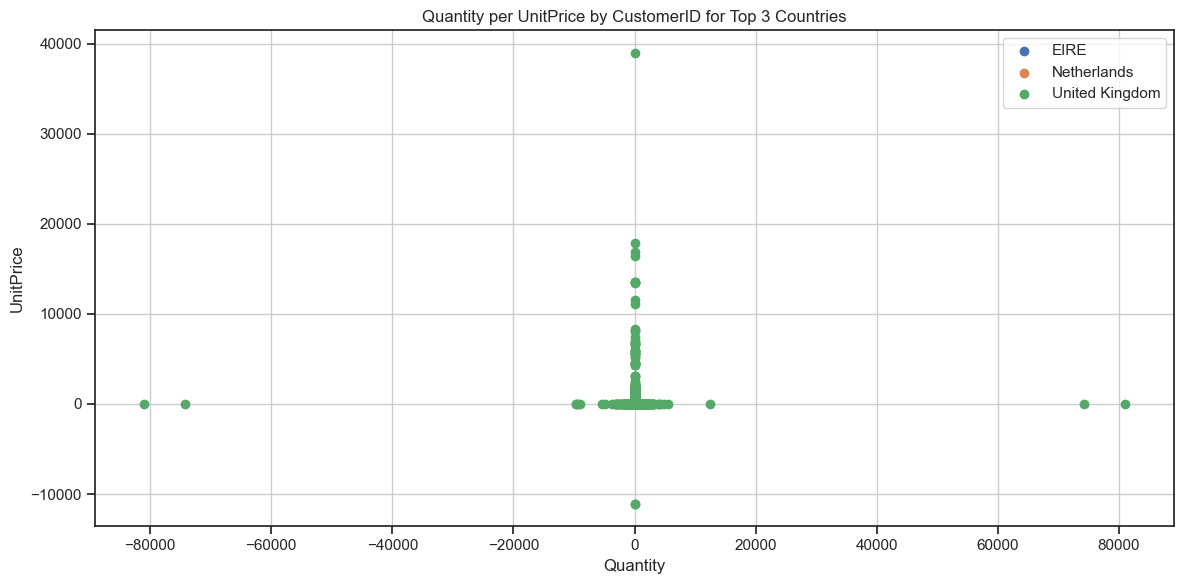

In [240]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
top_3_countries = online_rt.groupby('Country')['Revenue'].sum().nlargest(3).index
top_3_countries_data = online_rt[online_rt['Country'].isin(top_3_countries)]
plt.figure(figsize=(12, 6))
for country, data in top_3_countries_data.groupby('Country'):
    plt.scatter(data['Quantity'], data['UnitPrice'], label=country)

plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Quantity per UnitPrice by CustomerID for Top 3 Countries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## The below exercises (81-90) required to use FMCG_Company_Data_2019.csv file

### 81. Import the dataset FMCG_Company_Data_2019.csv and assign it to a variable called company_data

In [242]:
file_path = r'E:\Classes\Python\New folder\Basic Data Manipulation - Visualization Exercise\2. Basic Data Manipulation - Visualization Exercise\Exercise Data Files\FMCG_Company_Data_2019.csv'
FMCG_Company_Data_2019 = pd.read_csv(file_path)
FMCG_Company_Data_2019

,Month,FaceCream,FaceWash,ToothPaste,Soap,Shampo,Moisturizer,Total_Units,Total_Revenue,Total_Profit
0,Jan-19,2500,1500,5200,9200,1200,1500,21100,3584890,211000
1,Feb-19,2630,1200,5100,6100,2100,1200,18330,2864979,183300
2,Mar-19,2140,1340,4550,9550,3550,1340,22470,4058082,224700
3,Apr-19,3400,1130,5870,8870,1870,1130,22270,2890646,222700
4,May-19,3600,1740,4560,7760,1560,1740,20960,2997280,209600
5,Jun-19,2760,1555,4890,7490,1890,1555,20140,2857866,201400
6,Jul-19,2980,1120,4780,8980,1780,1120,29550,5735655,295500
7,Aug-19,3700,1400,5860,9960,2860,1400,36140,5196932,361400
8,Sep-19,3540,1780,6100,8100,2100,1780,23400,3060720,234000
9,Oct-19,1990,1890,8300,10300,2300,1890,26670,4661916,266700


### 82. Create line chart for Total Revenue of all months with following properties
- X label name = Month
- Y label name = Total Revenue

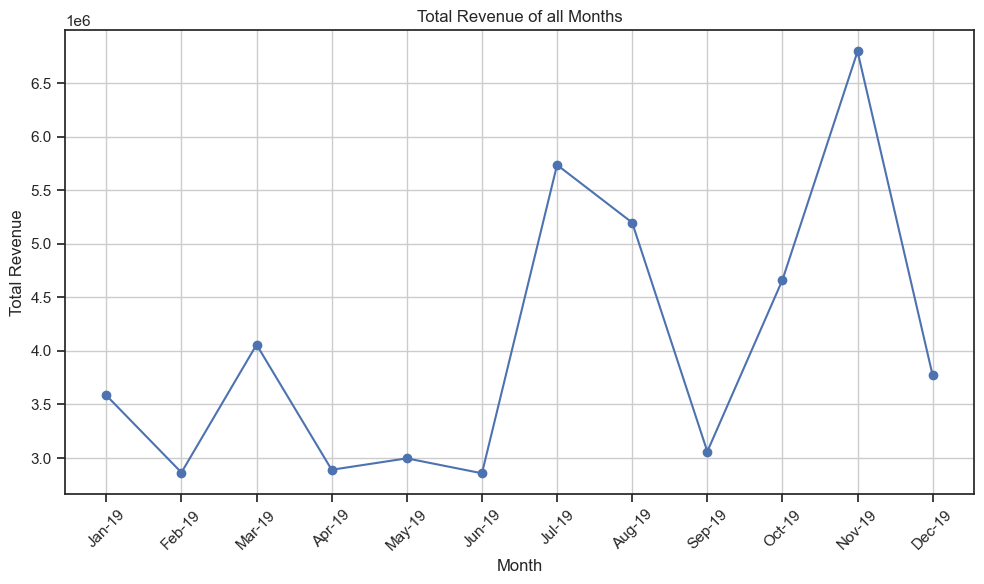

In [247]:
months = FMCG_Company_Data_2019.Month
total_revenue = FMCG_Company_Data_2019.Total_Revenue

plt.figure(figsize=(10, 6))
plt.plot(months, total_revenue, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue of all Months')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 83. Create line chart for Total Units of all months with following properties
- X label name = Month
- Y label name = Total Units
- Line Style dotted and Line-color should be red
- Show legend at the lower right location.

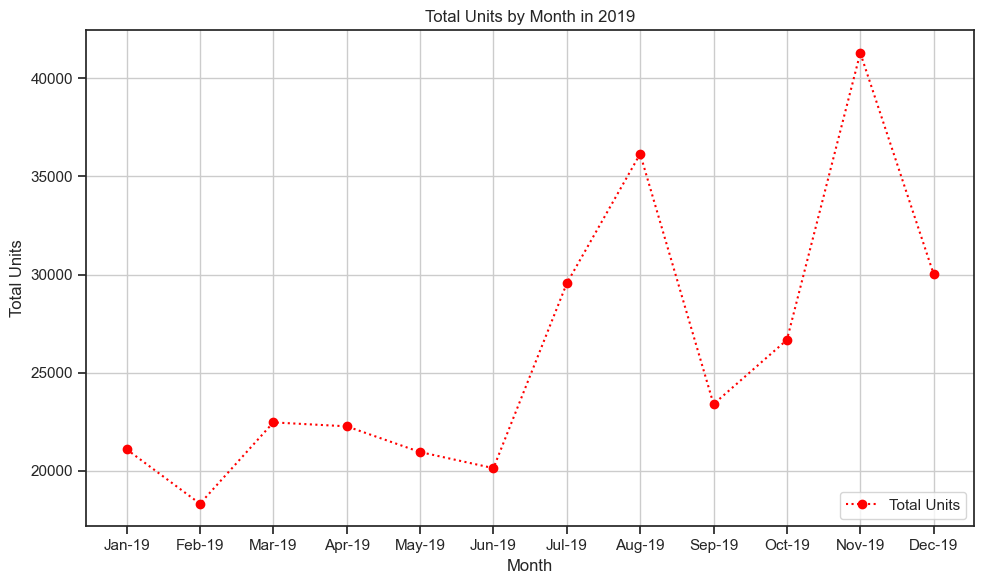

In [248]:
months = FMCG_Company_Data_2019.Month
total_units = FMCG_Company_Data_2019.Total_Units
plt.figure(figsize=(10, 6))
plt.plot(months, total_units, marker='o', color='red', linestyle='dotted', label='Total Units')
plt.xlabel('Month')
plt.ylabel('Total Units')
plt.title('Total Units by Month in 2019')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 84. Read all product sales data (Facecream, FaceWash, Toothpaste, Soap, Shampo, Moisturizer) and show it  using a multiline plot
- Display the number of units sold per month for each product using multiline plots. (i.e., Separate Plotline for each product ).

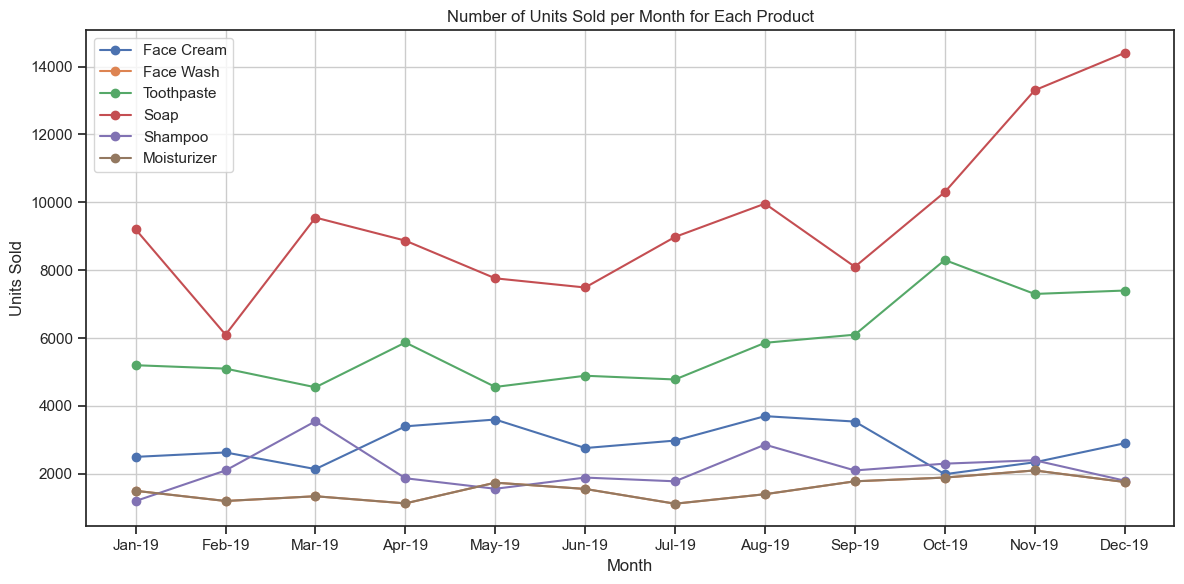

In [251]:
months = FMCG_Company_Data_2019.Month
facecream_units = FMCG_Company_Data_2019.FaceCream
facewash_units = FMCG_Company_Data_2019.FaceWash
toothpaste_units = FMCG_Company_Data_2019.ToothPaste
soap_units = FMCG_Company_Data_2019.Soap
shampo_units = FMCG_Company_Data_2019.Shampo
moisturizer_units = FMCG_Company_Data_2019.Moisturizer

plt.figure(figsize=(12, 6))
plt.plot(months, facecream_units, marker='o', linestyle='-', label='Face Cream')
plt.plot(months, facewash_units, marker='o', linestyle='-', label='Face Wash')
plt.plot(months, toothpaste_units, marker='o', linestyle='-', label='Toothpaste')
plt.plot(months, soap_units, marker='o', linestyle='-', label='Soap')
plt.plot(months, shampo_units, marker='o', linestyle='-', label='Shampoo')
plt.plot(months, moisturizer_units, marker='o', linestyle='-', label='Moisturizer')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Number of Units Sold per Month for Each Product')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### 85. Create Bar Chart for soap of all months and Save the chart in folder

Chart saved as 'charts/soap_sales_chart.png'


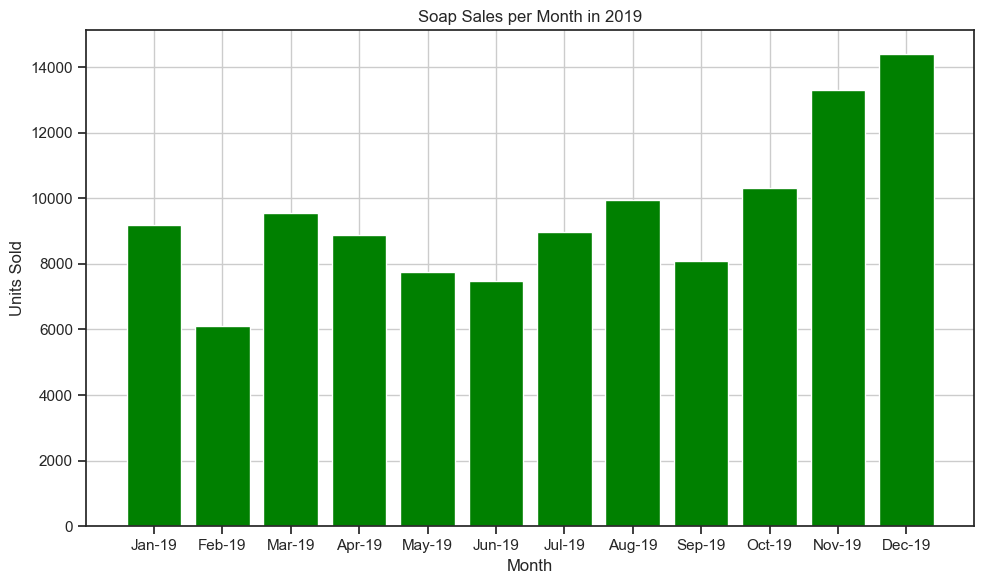

In [256]:
import os
months = FMCG_Company_Data_2019.Month
soap_units = FMCG_Company_Data_2019.Soap
plt.figure(figsize=(10, 6))
plt.bar(months, soap_units, color='green', align='center')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Soap Sales per Month in 2019')
plt.grid(True)
plt.tight_layout()
if not os.path.exists('charts'):
    os.makedirs('charts')
chart_filename = 'charts/soap_sales_chart.png'
plt.savefig(chart_filename)
print(f"Chart saved as '{chart_filename}'")
plt.show()

### 86. Create Stacked Bar Chart for Soap, Shampo, ToothPaste for each month
The bar chart should display the number of units sold per month for each product. Add a separate bar for each product in the same chart.

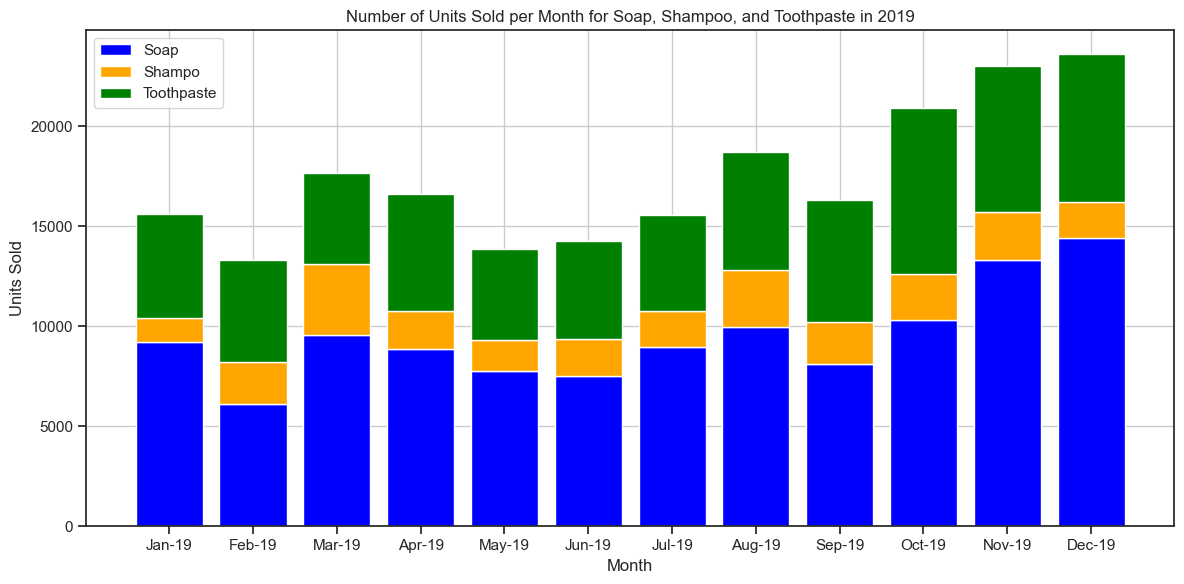

In [258]:
months = FMCG_Company_Data_2019.Month
soap_units = FMCG_Company_Data_2019.Soap
shampo_units = FMCG_Company_Data_2019.Shampo
toothpaste_units = FMCG_Company_Data_2019.ToothPaste


plt.figure(figsize=(12, 6))
plt.bar(months, soap_units, color='blue', label='Soap')
plt.bar(months, shampo_units, color='orange', bottom=soap_units, label='Shampo')
plt.bar(months, toothpaste_units, color='green', bottom=[soap + shampo for soap, shampo in zip(soap_units, shampo_units)], label='Toothpaste')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.title('Number of Units Sold per Month for Soap, Shampoo, and Toothpaste in 2019')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### 87. Create Histogram for Total Revenue

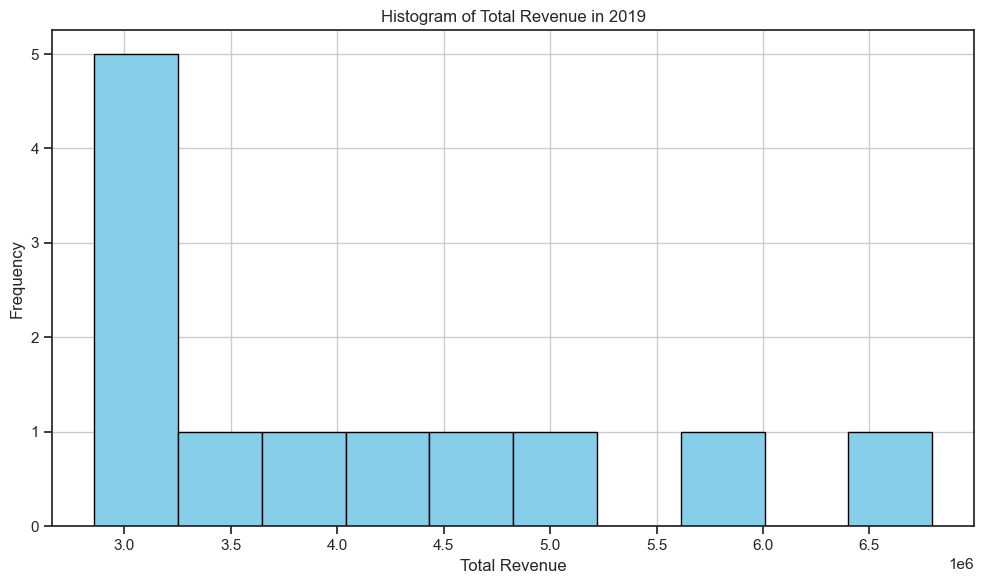

In [259]:
total_revenue = FMCG_Company_Data_2019.Total_Revenue
plt.figure(figsize=(10, 6))
plt.hist(total_revenue, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.title('Histogram of Total Revenue in 2019')
plt.grid(True)
plt.tight_layout()
plt.show()

### 88. Calculate total sales data (quantity) for 2019 for each product and show it using a Pie chart. Understand percentage contribution from each product

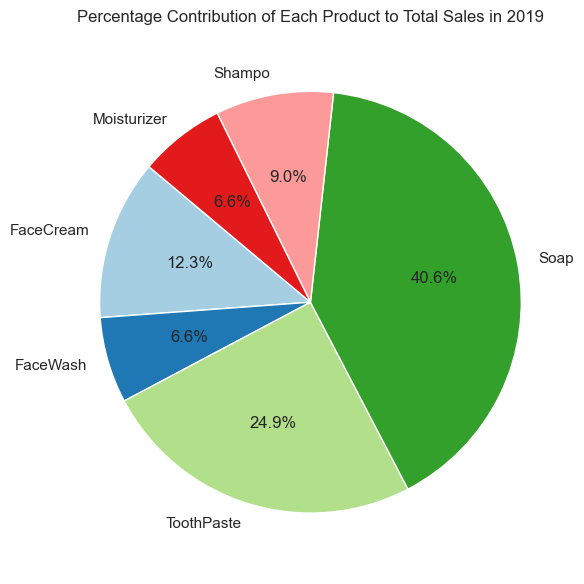

In [265]:
products = ['FaceCream', 'FaceWash', 'ToothPaste', 'Soap', 'Shampo', 'Moisturizer']
total_units_2019 = [2500, 1500, 5200, 9200, 1200, 1500,   # Jan
                    2630, 1200, 5100, 6100, 2100, 1200,   # Feb
                    2140, 1340, 4550, 9550, 3550, 1340,   # Mar
                    3400, 1130, 5870, 8870, 1870, 1130,   # Apr
                    3600, 1740, 4560, 7760, 1560, 1740,   # May
                    2760, 1555, 4890, 7490, 1890, 1555,   # Jun
                    2980, 1120, 4780, 8980, 1780, 1120,   # Jul
                    3700, 1400, 5860, 9960, 2860, 1400,   # Aug
                    3540, 1780, 6100, 8100, 2100, 1780,   # Sep
                    1990, 1890, 8300, 10300, 2300, 1890,  # Oct
                    2340, 2100, 7300, 13300, 2400, 2100,  # Nov
                    2900, 1760, 7400, 14400, 1800, 1760]  # Dec
total_sales_per_product = [sum(total_units_2019[i::6]) for i in range(6)]
plt.figure(figsize=(6, 6))
plt.pie(total_sales_per_product, labels=products, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage Contribution of Each Product to Total Sales in 2019')
plt.axis('equal')
plt.tight_layout()
plt.show()


### 89. Create line plots for Soap & Facewash of all months in a single plot using Subplot

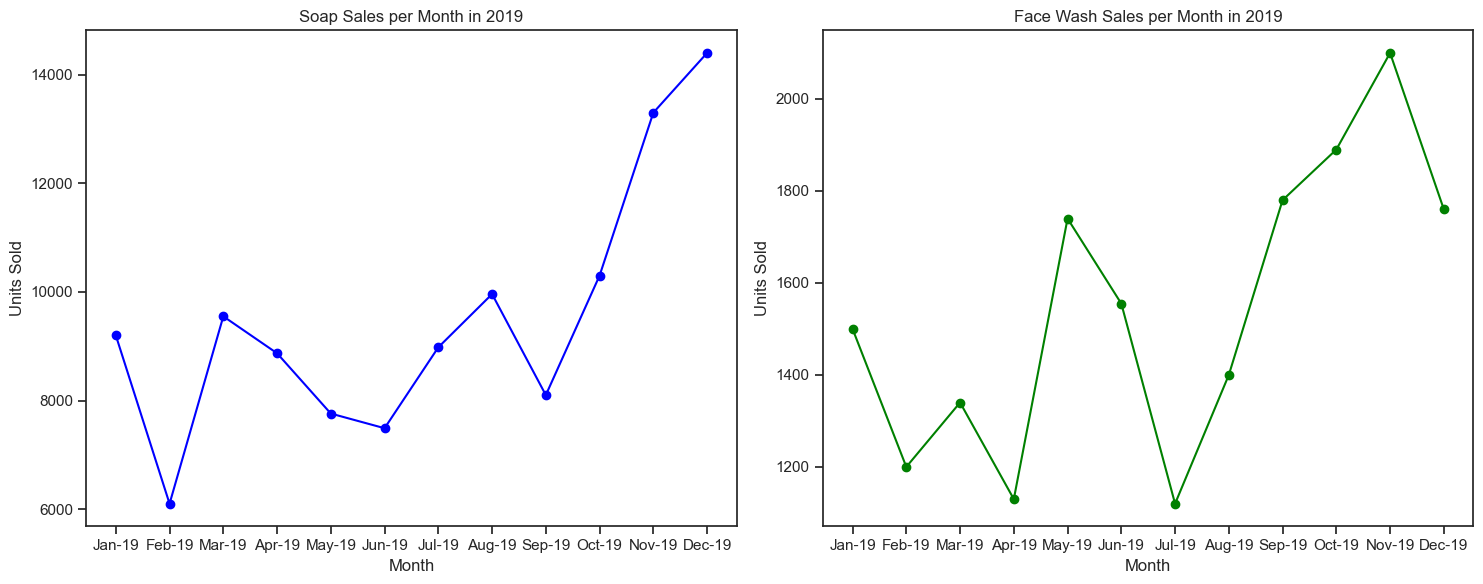

In [269]:
months = FMCG_Company_Data_2019.Month
soap_units = FMCG_Company_Data_2019.Soap
facewash_units = FMCG_Company_Data_2019.FaceWash
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(months, soap_units, marker='o', linestyle='-', color='blue')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Units Sold')
ax[0].set_title('Soap Sales per Month in 2019')
ax[1].plot(months, facewash_units, marker='o', linestyle='-', color='green')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Units Sold')
ax[1].set_title('Face Wash Sales per Month in 2019')
plt.tight_layout()
plt.show()


### 90. Create Box Plot for Total Profit variable

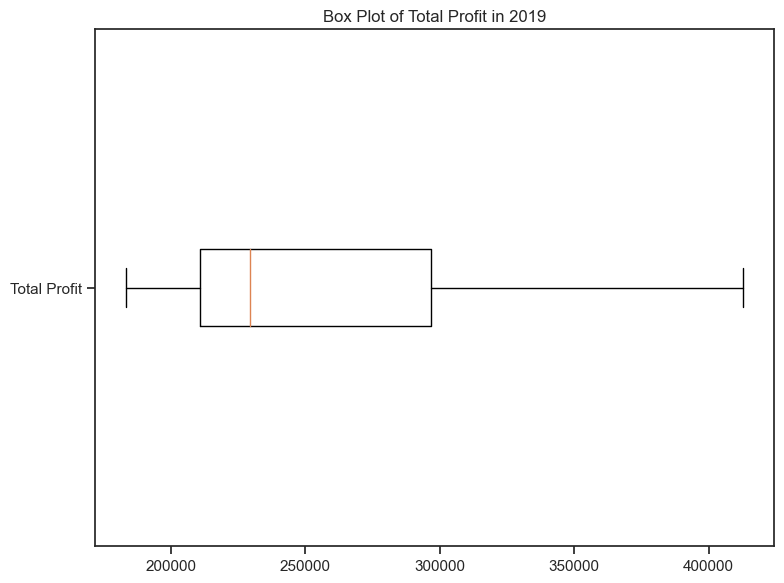

In [270]:
total_profit = FMCG_Company_Data_2019.Total_Profit
plt.figure(figsize=(8, 6))
plt.boxplot(total_profit, vert=False, labels=['Total Profit'])
plt.title('Box Plot of Total Profit in 2019')
plt.tight_layout()
plt.show()
